In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error

# SVR Linear (dados originais)

In [2]:
df = pd.read_csv('./melting-point/train_wz_ws.csv')

In [3]:
melting_point={}
melting_point["data"] = df.drop(['Tm'], axis=1).values
melting_point["target"] = df["Tm"].values

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(melting_point["data"], melting_point["target"], test_size=0.1)

In [5]:
from sklearn.svm import LinearSVR
from sklearn.model_selection import cross_val_score

lsvr = LinearSVR(max_iter=1000)

svm_scores = cross_val_score(lsvr, melting_point["data"], melting_point["target"], cv=10, scoring='neg_mean_absolute_error')
print(svm_scores)
print(svm_scores.mean())
print(svm_scores.std())

[-41.34131334 -37.06194806 -40.82681589 -36.77600494 -39.59273039
 -37.70198946 -41.76930708 -36.14154491 -38.70779189 -35.56933723]
-38.548878318051
2.12642697089886


In [6]:
from sklearn.model_selection import GridSearchCV
import multiprocessing

parameters = {
    'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0],
    'loss': ['epsilon_insensitive', 'squared_epsilon_insensitive']
}
clf = GridSearchCV(lsvr, parameters, n_jobs=multiprocessing.cpu_count(), cv=10, scoring='r2')

In [7]:
clf.fit(X_train, Y_train)
pred = clf.predict(X_test)

print("R2 score:", clf.score(X_test, Y_test))
print("Mean Absolute error:", mean_absolute_error(Y_test, pred))

R2 score: 0.7399927042616334
Mean Absolute error: 28.119166645570772


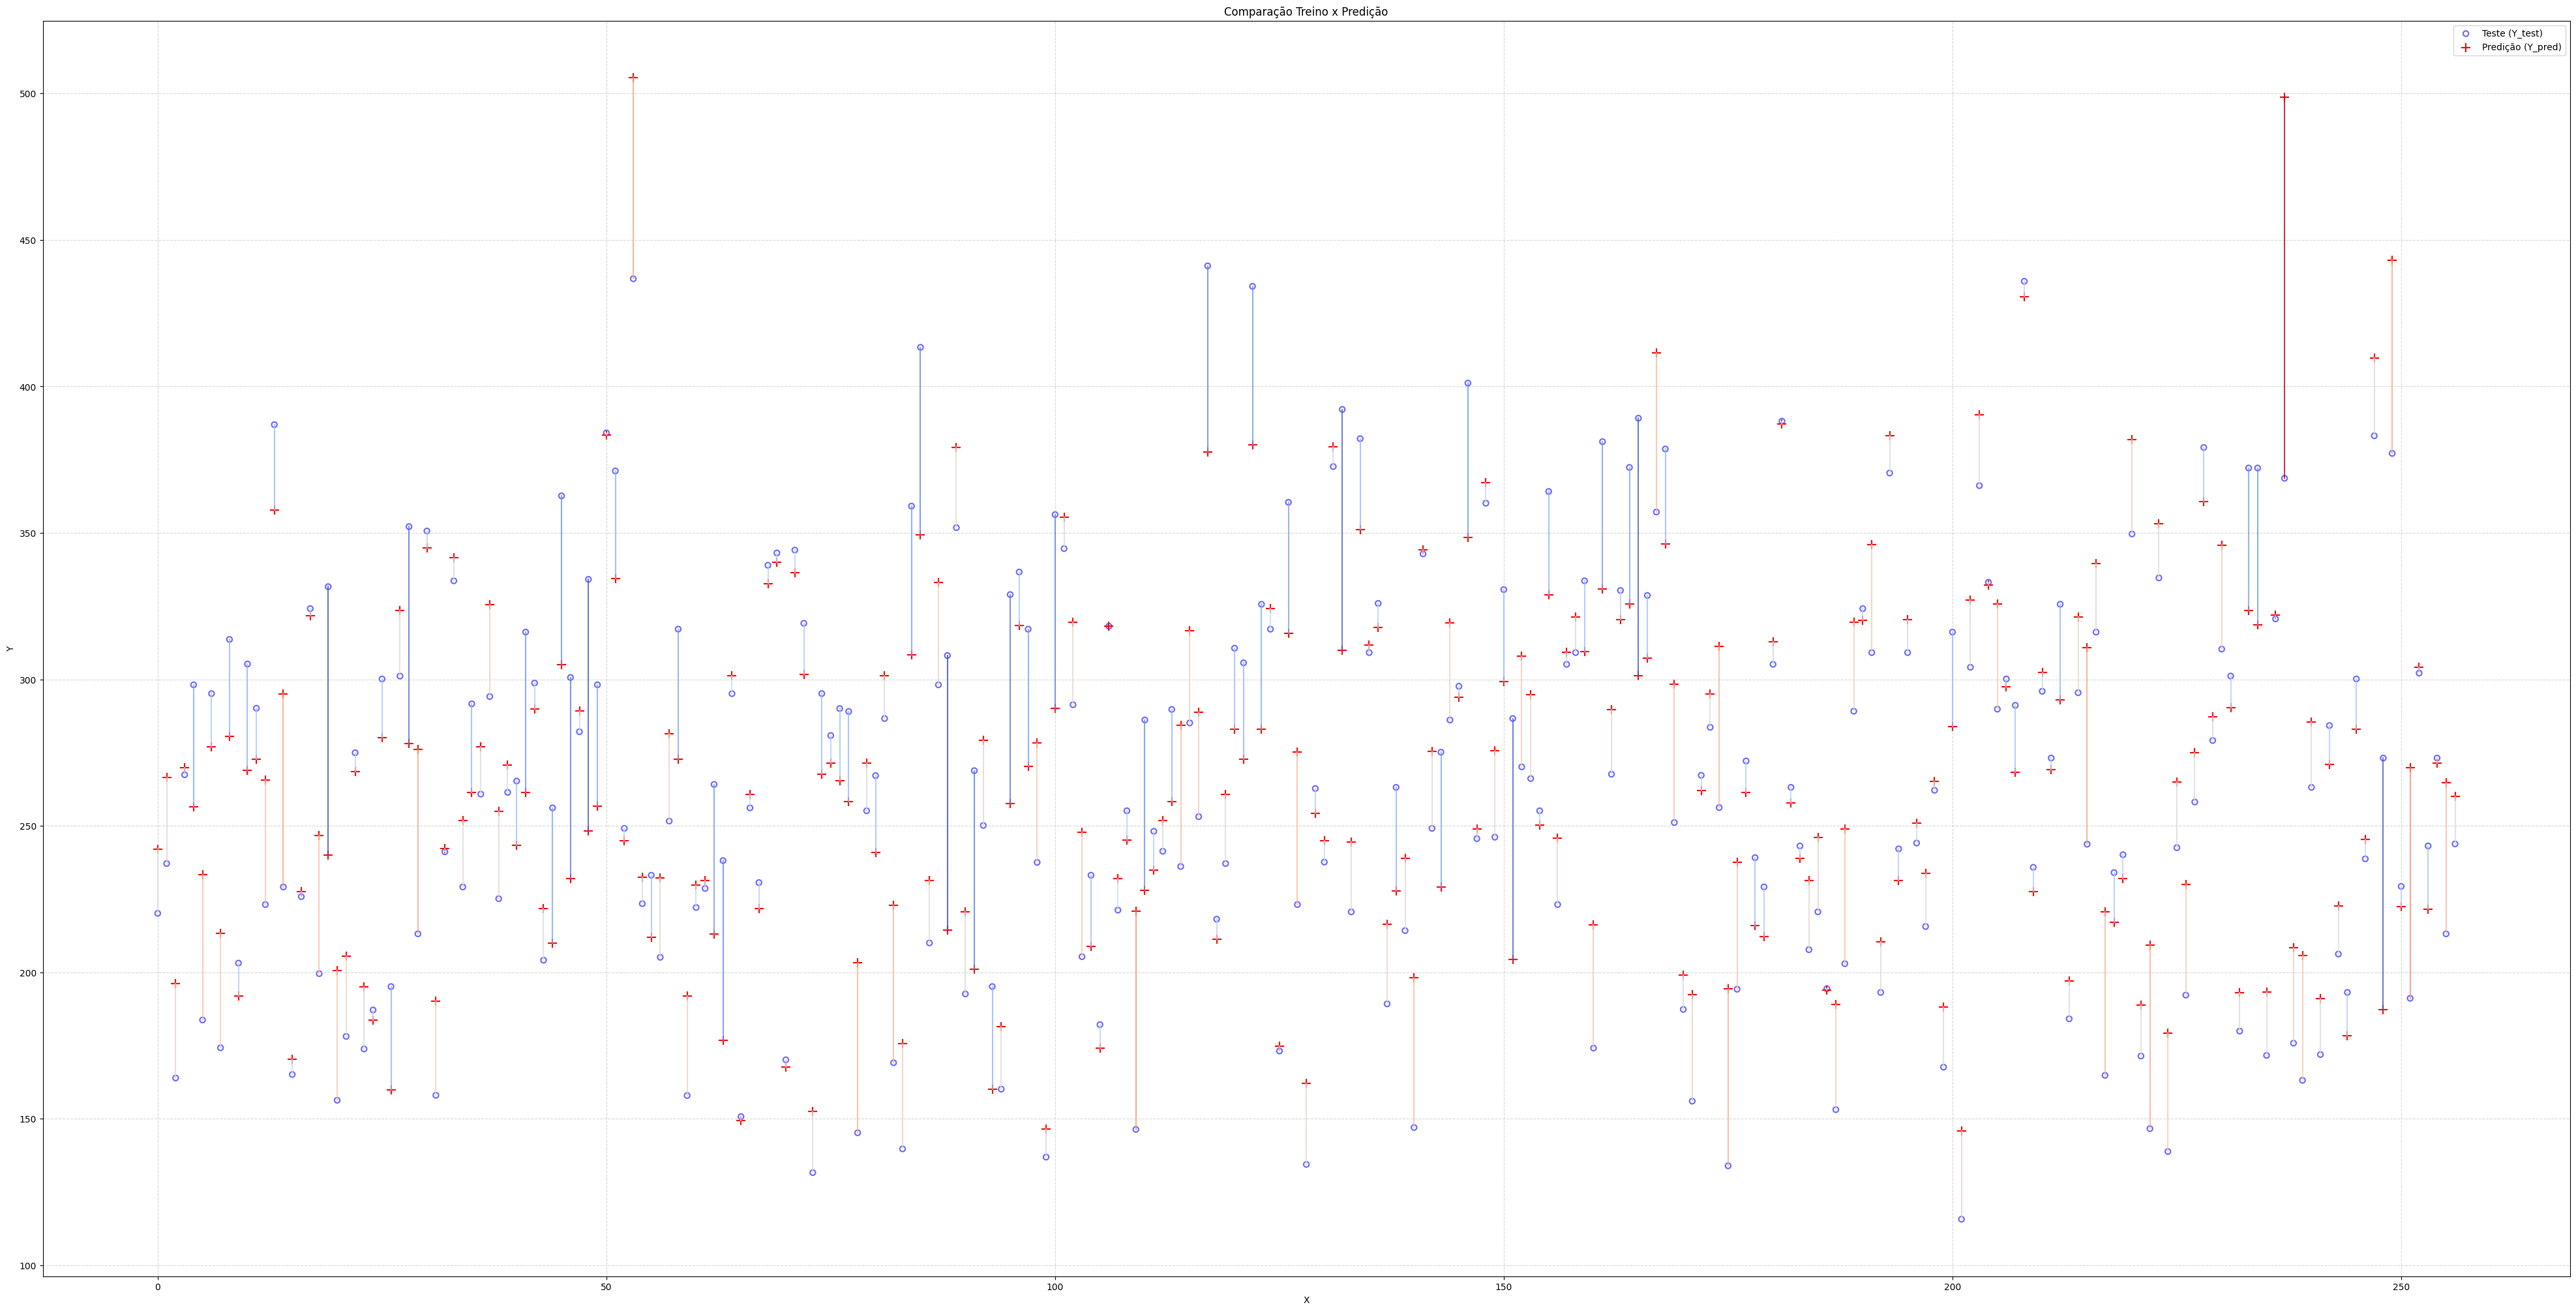

In [8]:
plt.figure(figsize=(50, 25))
x_range = np.arange(0, len(X_test), 1)
plt.scatter(x_range, Y_test, color='blue', alpha=0.6, label='Teste (Y_test)', facecolors='none', edgecolors='blue', linewidths=1.5)
plt.scatter(x_range, pred, color='red', marker='+', label='Predição (Y_pred)', s=100)

diff = pred - Y_test

norm = Normalize(vmin=np.min(diff), vmax=np.max(diff))
cmap = plt.cm.coolwarm  # azul pra negativo, vermelho pra positivo

for x, y_real, y_est, d in zip(x_range, Y_test, pred, diff):
    cor = cmap(norm(d))
    plt.plot([x, x], [y_real, y_est], color=cor, linewidth=1.5, alpha=0.8)

plt.title("Comparação Treino x Predição")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig("LinearSVR.png", dpi=300, bbox_inches='tight')
plt.show()

In [9]:
lsvr_scores = cross_val_score(clf.best_estimator_, melting_point["data"], melting_point["target"], cv=10, scoring='neg_mean_absolute_error')
print(lsvr_scores)
print(lsvr_scores.mean())
print(lsvr_scores.std())

[-31.78347326 -30.34157877 -34.09314089 -28.90673318 -31.88878053
 -31.93118548 -33.26169208 -31.31206659 -34.01135635 -30.25069742]
-31.778070453779076
1.5950578155391917


## NuSVR Linear

In [10]:
from sklearn.svm import NuSVR

param_grid = [ 
    {  
        'nu': np.arange(0.05, 1.0, 0.05) 
    } 
] 
 
gs = GridSearchCV(estimator=NuSVR(kernel='linear'), param_grid=param_grid, scoring='r2', cv=10, n_jobs=multiprocessing.cpu_count()) 

In [11]:
gs.fit(X_train, Y_train)
pred = gs.predict(X_test)

print("R2 score:", gs.score(X_test, Y_test))
print("Mean Absolute error:", mean_absolute_error(Y_test, pred))

R2 score: 0.5974438833989077
Mean Absolute error: 33.94200162359375


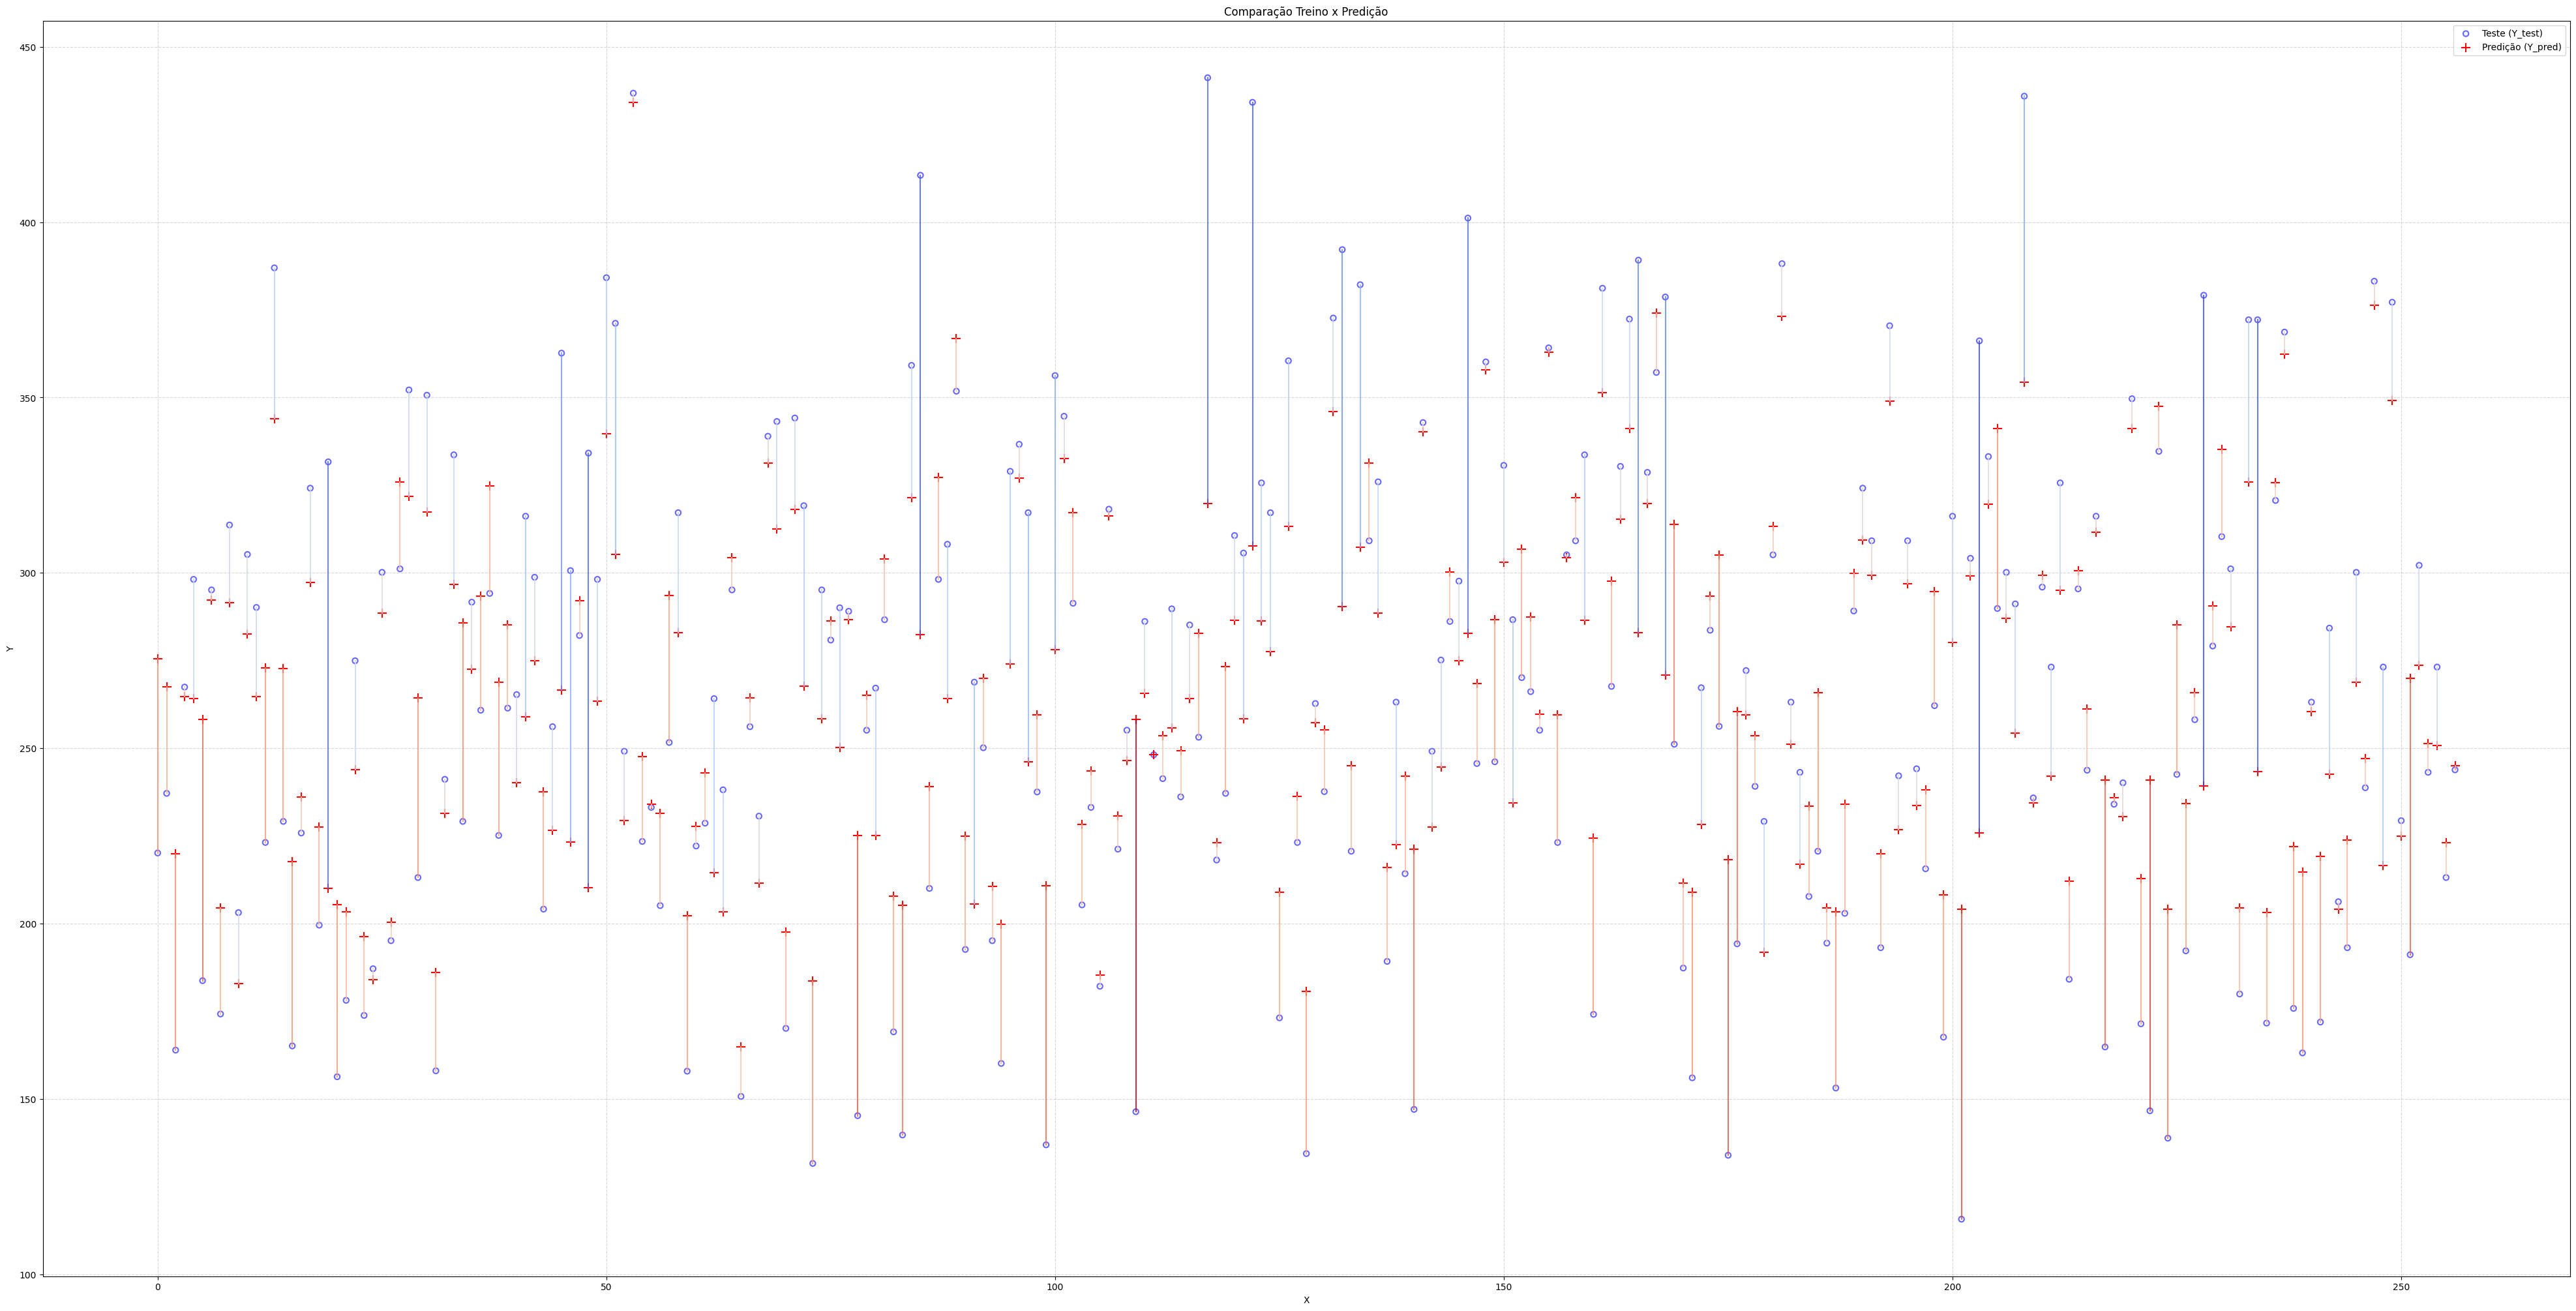

In [12]:
plt.figure(figsize=(50, 25))
x_range = np.arange(0, len(X_test), 1)
plt.scatter(x_range, Y_test, color='blue', alpha=0.6, label='Teste (Y_test)', facecolors='none', edgecolors='blue', linewidths=1.5)
plt.scatter(x_range, pred, color='red', marker='+', label='Predição (Y_pred)', s=100)

diff = pred - Y_test

norm = Normalize(vmin=np.min(diff), vmax=np.max(diff))
cmap = plt.cm.coolwarm  # azul pra negativo, vermelho pra positivo

for x, y_real, y_est, d in zip(x_range, Y_test, pred, diff):
    cor = cmap(norm(d))
    plt.plot([x, x], [y_real, y_est], color=cor, linewidth=1.5, alpha=0.8)

plt.title("Comparação Treino x Predição")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig("LinearNuSVR.png", dpi=300, bbox_inches='tight')
plt.show()

In [13]:
lsvr_scores = cross_val_score(gs.best_estimator_, melting_point["data"], melting_point["target"], cv=10, scoring='neg_mean_absolute_error')
print(lsvr_scores)
print(lsvr_scores.mean())
print(lsvr_scores.std())

[-40.75624775 -37.28726316 -40.91051932 -37.63460549 -38.52692453
 -37.35119333 -41.242692   -37.46892622 -39.84313073 -35.00981999]
-38.6031322520874
1.9210893758450442


# SVR Não-Linear (dados originais)

In [14]:
from sklearn.svm import SVR

param_grid =  {  
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
} 

gs = GridSearchCV(SVR(max_iter=1000), param_grid, n_jobs=multiprocessing.cpu_count(), cv=10, scoring='r2')

In [15]:
gs.fit(X_train, Y_train)
pred = gs.predict(X_test)

print("R2 score:", gs.score(X_test, Y_test))
print("Mean Absolute error:", mean_absolute_error(Y_test, pred))

D:\puc\ml\venv\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


R2 score: 0.45796224903527216
Mean Absolute error: 40.18892143991224


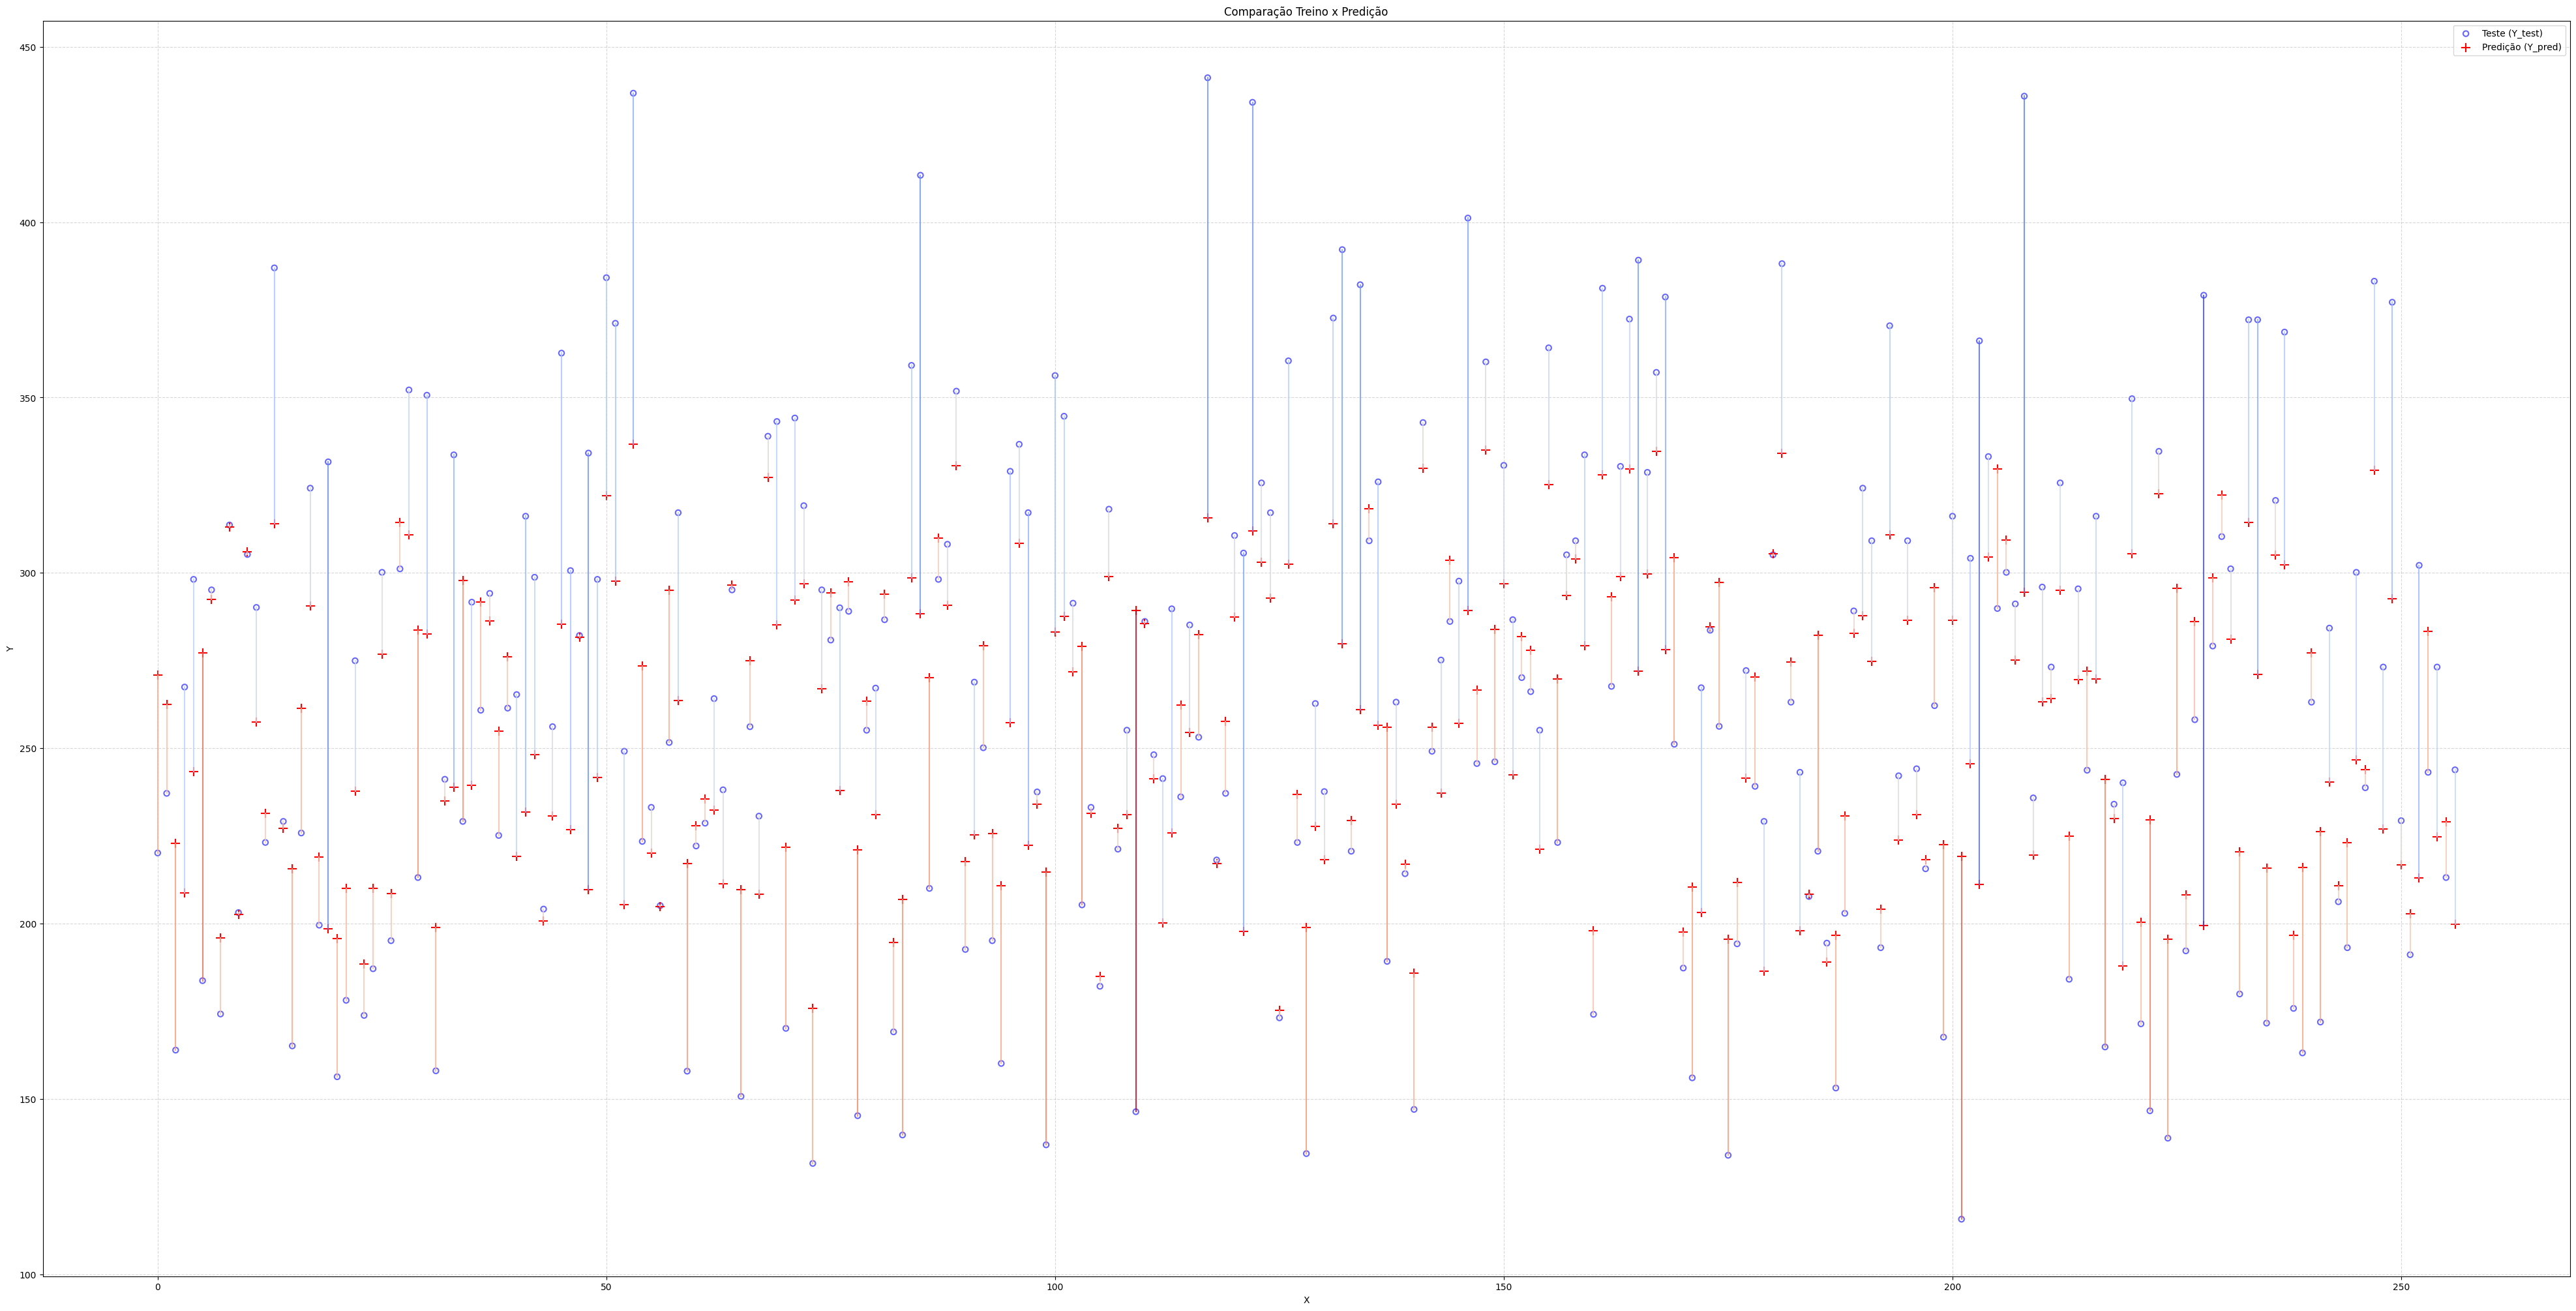

In [16]:
plt.figure(figsize=(50, 25))
x_range = np.arange(0, len(X_test), 1)
plt.scatter(x_range, Y_test, color='blue', alpha=0.6, label='Teste (Y_test)', facecolors='none', edgecolors='blue', linewidths=1.5)
plt.scatter(x_range, pred, color='red', marker='+', label='Predição (Y_pred)', s=100)

diff = pred - Y_test

norm = Normalize(vmin=np.min(diff), vmax=np.max(diff))
cmap = plt.cm.coolwarm  # azul pra negativo, vermelho pra positivo

for x, y_real, y_est, d in zip(x_range, Y_test, pred, diff):
    cor = cmap(norm(d))
    plt.plot([x, x], [y_real, y_est], color=cor, linewidth=1.5, alpha=0.8)

plt.title("Comparação Treino x Predição")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig("NonLinearSVR.png", dpi=300, bbox_inches='tight')
plt.show()

In [17]:
svr_scores = cross_val_score(gs.best_estimator_, melting_point["data"], melting_point["target"], cv=10, scoring='neg_mean_absolute_error')
print(svr_scores)
print(svr_scores.mean())
print(svr_scores.std())

D:\puc\ml\venv\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
D:\puc\ml\venv\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
D:\puc\ml\venv\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
D:\puc\ml\venv\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
D:\puc\ml\venv\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with Stan

[-42.44098204 -39.22660057 -43.15132218 -43.6370417  -43.9384265
 -43.09109864 -44.66822617 -39.84109624 -44.41707965 -38.26378727]
-42.26756609544757
2.184160964630612


D:\puc\ml\venv\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


# SVR Linear (dados escalonados)

In [18]:
df = pd.read_csv('./melting-point/train_wz_ws.csv')

In [19]:
melting_point={}
melting_point["data"] = df.drop(['Tm'], axis=1).values
melting_point["target"] = df["Tm"].values

In [20]:
from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

lsvr = LinearSVR(max_iter=1000)

svm_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', lsvr)
])
svm_scores = cross_val_score(svm_pipe, melting_point["data"], melting_point["target"], cv=10, scoring='neg_mean_absolute_error')
print(svm_scores)
print(svm_scores.mean())
print(svm_scores.std())

[-33.13470722 -29.25459705 -35.3100584  -28.15233299 -32.95406013
 -32.85046448 -33.58630643 -31.12254611 -33.90435073 -30.92915587]
-32.11985794333546
2.1008388663549957


In [21]:
from sklearn.model_selection import GridSearchCV
import multiprocessing

parameters = {
    'svm__C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0],
    'svm__loss': ['epsilon_insensitive', 'squared_epsilon_insensitive']
}
clf = GridSearchCV(svm_pipe, parameters, n_jobs=multiprocessing.cpu_count(), cv=10, scoring='r2')

In [22]:
clf.fit(X_train, Y_train)
pred = clf.predict(X_test)

print("R2 score:", clf.score(X_test, Y_test))
print("Mean Absolute error:", mean_absolute_error(Y_test, pred))

R2 score: 0.7121478153106454
Mean Absolute error: 28.374455975710646


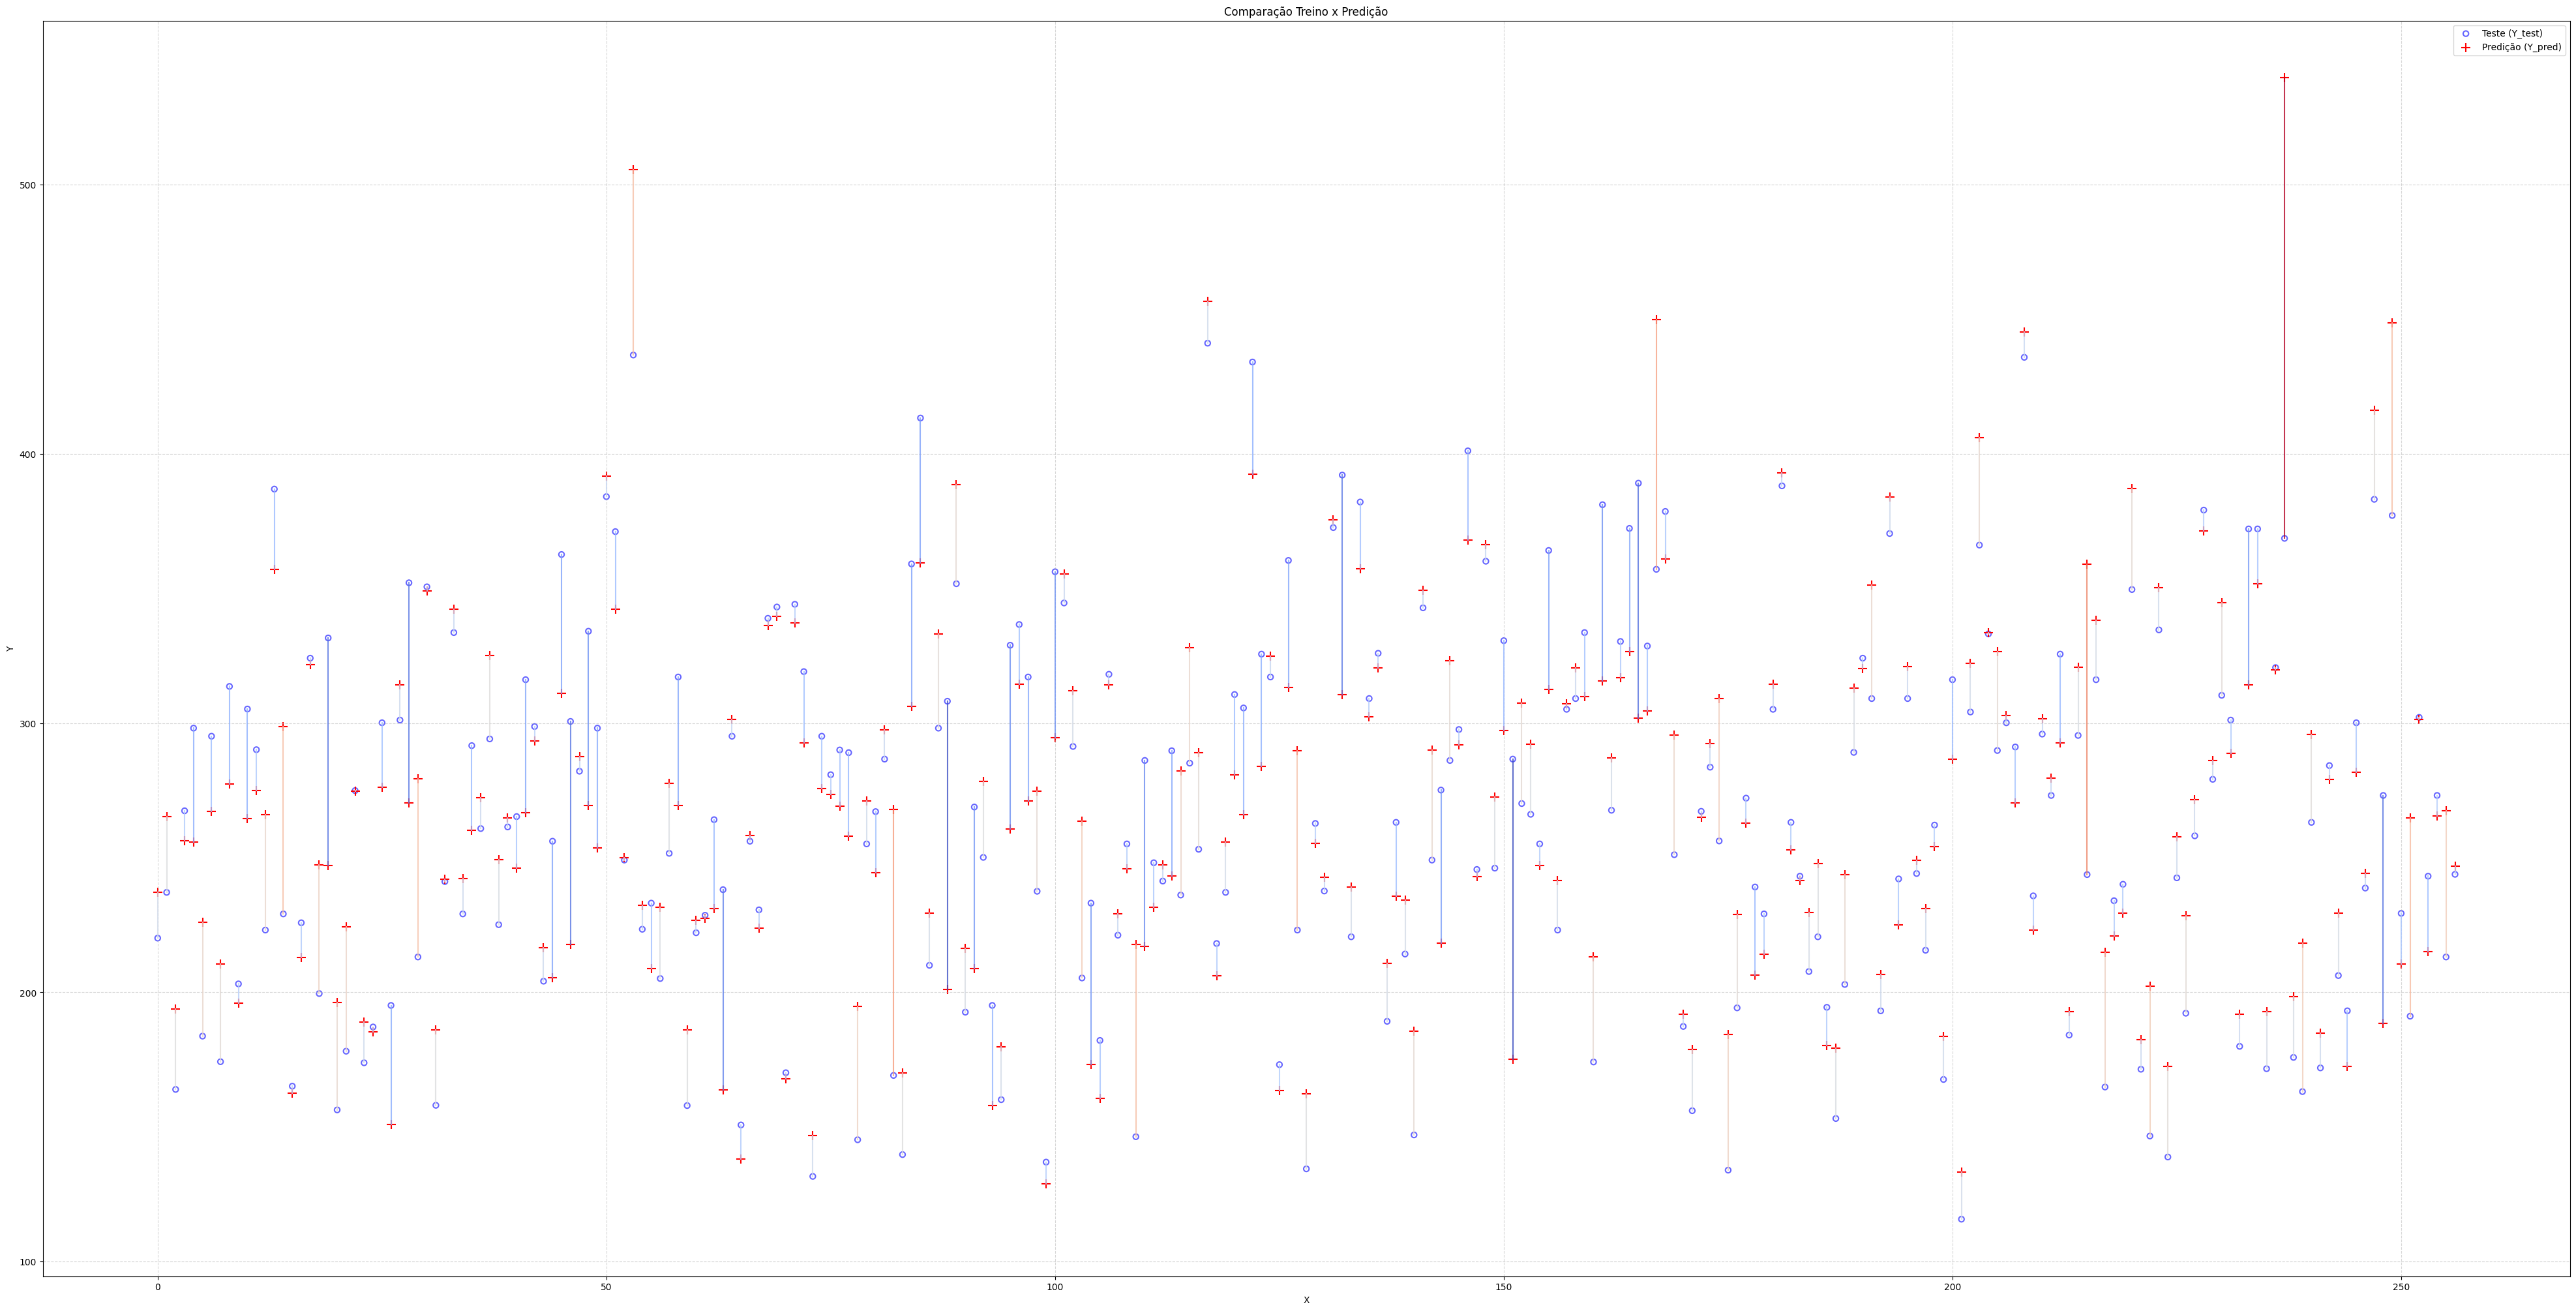

In [23]:
plt.figure(figsize=(50, 25))
x_range = np.arange(0, len(X_test), 1)
plt.scatter(x_range, Y_test, color='blue', alpha=0.6, label='Teste (Y_test)', facecolors='none', edgecolors='blue', linewidths=1.5)
plt.scatter(x_range, pred, color='red', marker='+', label='Predição (Y_pred)', s=100)

diff = pred - Y_test

norm = Normalize(vmin=np.min(diff), vmax=np.max(diff))
cmap = plt.cm.coolwarm  # azul pra negativo, vermelho pra positivo

for x, y_real, y_est, d in zip(x_range, Y_test, pred, diff):
    cor = cmap(norm(d))
    plt.plot([x, x], [y_real, y_est], color=cor, linewidth=1.5, alpha=0.8)

plt.title("Comparação Treino x Predição")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig("LinearSVRScaled.png", dpi=300, bbox_inches='tight')
plt.show()

In [24]:
lsvr_scores = cross_val_score(clf.best_estimator_, melting_point["data"], melting_point["target"], cv=10, scoring='neg_mean_absolute_error')
print(lsvr_scores)
print(lsvr_scores.mean())
print(lsvr_scores.std())

[-32.46633636 -29.59537361 -35.66442989 -28.33753858 -31.69218288
 -31.90384939 -32.89779387 -30.72697103 -34.00276114 -31.03295385]
-31.83201905964802
2.0009011749172885


## NuSVR Linear

In [25]:
from sklearn.svm import NuSVR

param_grid = [ 
    {  
        'svm__nu': np.arange(0.05, 1.0, 0.05) 
    } 
]

svm_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', NuSVR(kernel='linear'))
])
 
gs = GridSearchCV(svm_pipe, param_grid=param_grid, scoring='r2', cv=10, n_jobs=multiprocessing.cpu_count()) 

In [26]:
gs.fit(X_train, Y_train)
pred = gs.predict(X_test)

print("R2 score:", gs.score(X_test, Y_test))
print("Mean Absolute error:", mean_absolute_error(Y_test, pred))

R2 score: 0.7384652039704711
Mean Absolute error: 27.96503229892052


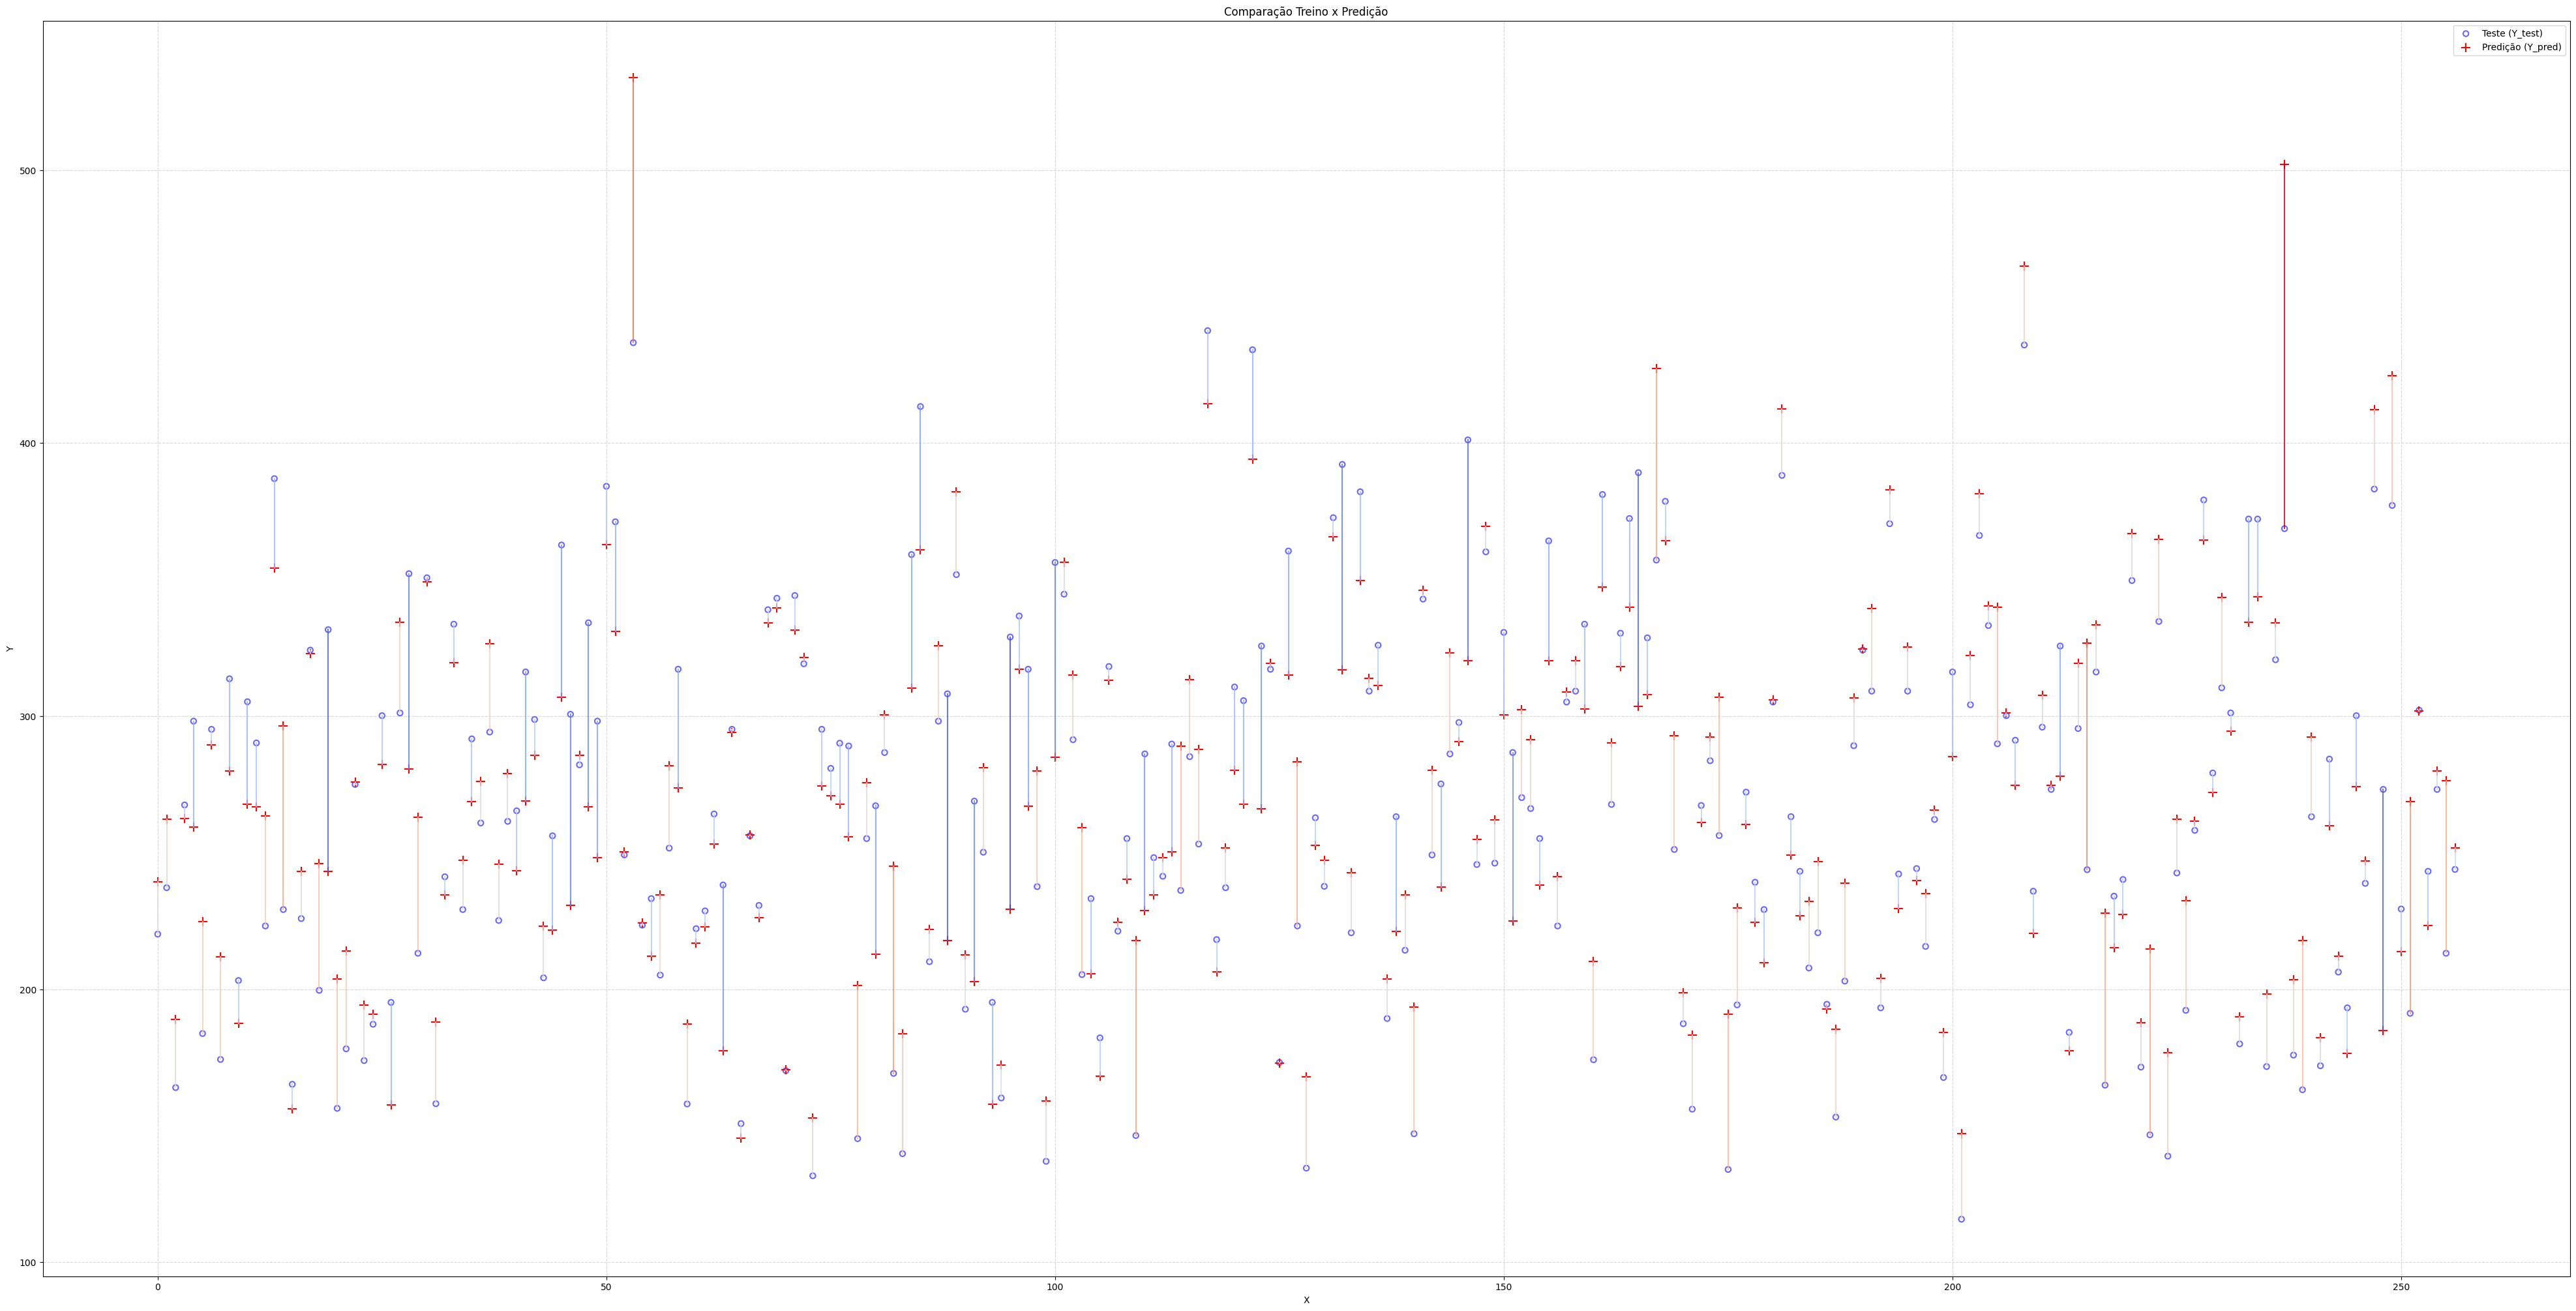

In [27]:
plt.figure(figsize=(50, 25))
x_range = np.arange(0, len(X_test), 1)
plt.scatter(x_range, Y_test, color='blue', alpha=0.6, label='Teste (Y_test)', facecolors='none', edgecolors='blue', linewidths=1.5)
plt.scatter(x_range, pred, color='red', marker='+', label='Predição (Y_pred)', s=100)

diff = pred - Y_test

norm = Normalize(vmin=np.min(diff), vmax=np.max(diff))
cmap = plt.cm.coolwarm  # azul pra negativo, vermelho pra positivo

for x, y_real, y_est, d in zip(x_range, Y_test, pred, diff):
    cor = cmap(norm(d))
    plt.plot([x, x], [y_real, y_est], color=cor, linewidth=1.5, alpha=0.8)

plt.title("Comparação Treino x Predição")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig("LinearNuSVRScaled.png", dpi=300, bbox_inches='tight')
plt.show()

In [28]:
lsvr_scores = cross_val_score(gs.best_estimator_, melting_point["data"], melting_point["target"], cv=10, scoring='neg_mean_absolute_error')
print(lsvr_scores)
print(lsvr_scores.mean())
print(lsvr_scores.std())

[-31.66744212 -29.11845535 -33.93625147 -28.28567762 -31.81413542
 -31.73173212 -33.27459524 -31.57117543 -32.8563668  -30.68237038]
-31.493820192925085
1.666777836876522


# SVR Não-Linear (dados escalonados)

In [29]:
from sklearn.svm import SVR

param_grid =  {  
    'svm__kernel': ['rbf', 'poly', 'sigmoid'],
    'svm__C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0],
    'svm__degree': [2,3]
} 

svm_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVR(max_iter=1000))
])

gs = GridSearchCV(svm_pipe, param_grid, n_jobs=multiprocessing.cpu_count(), cv=10, scoring='r2')

In [30]:
gs.fit(X_train, Y_train)
pred = gs.predict(X_test)

print("R2 score:", gs.score(X_test, Y_test))
print("Mean Absolute error:", mean_absolute_error(Y_test, pred))

D:\puc\ml\venv\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


R2 score: 0.36246061848354094
Mean Absolute error: 44.44542815465159


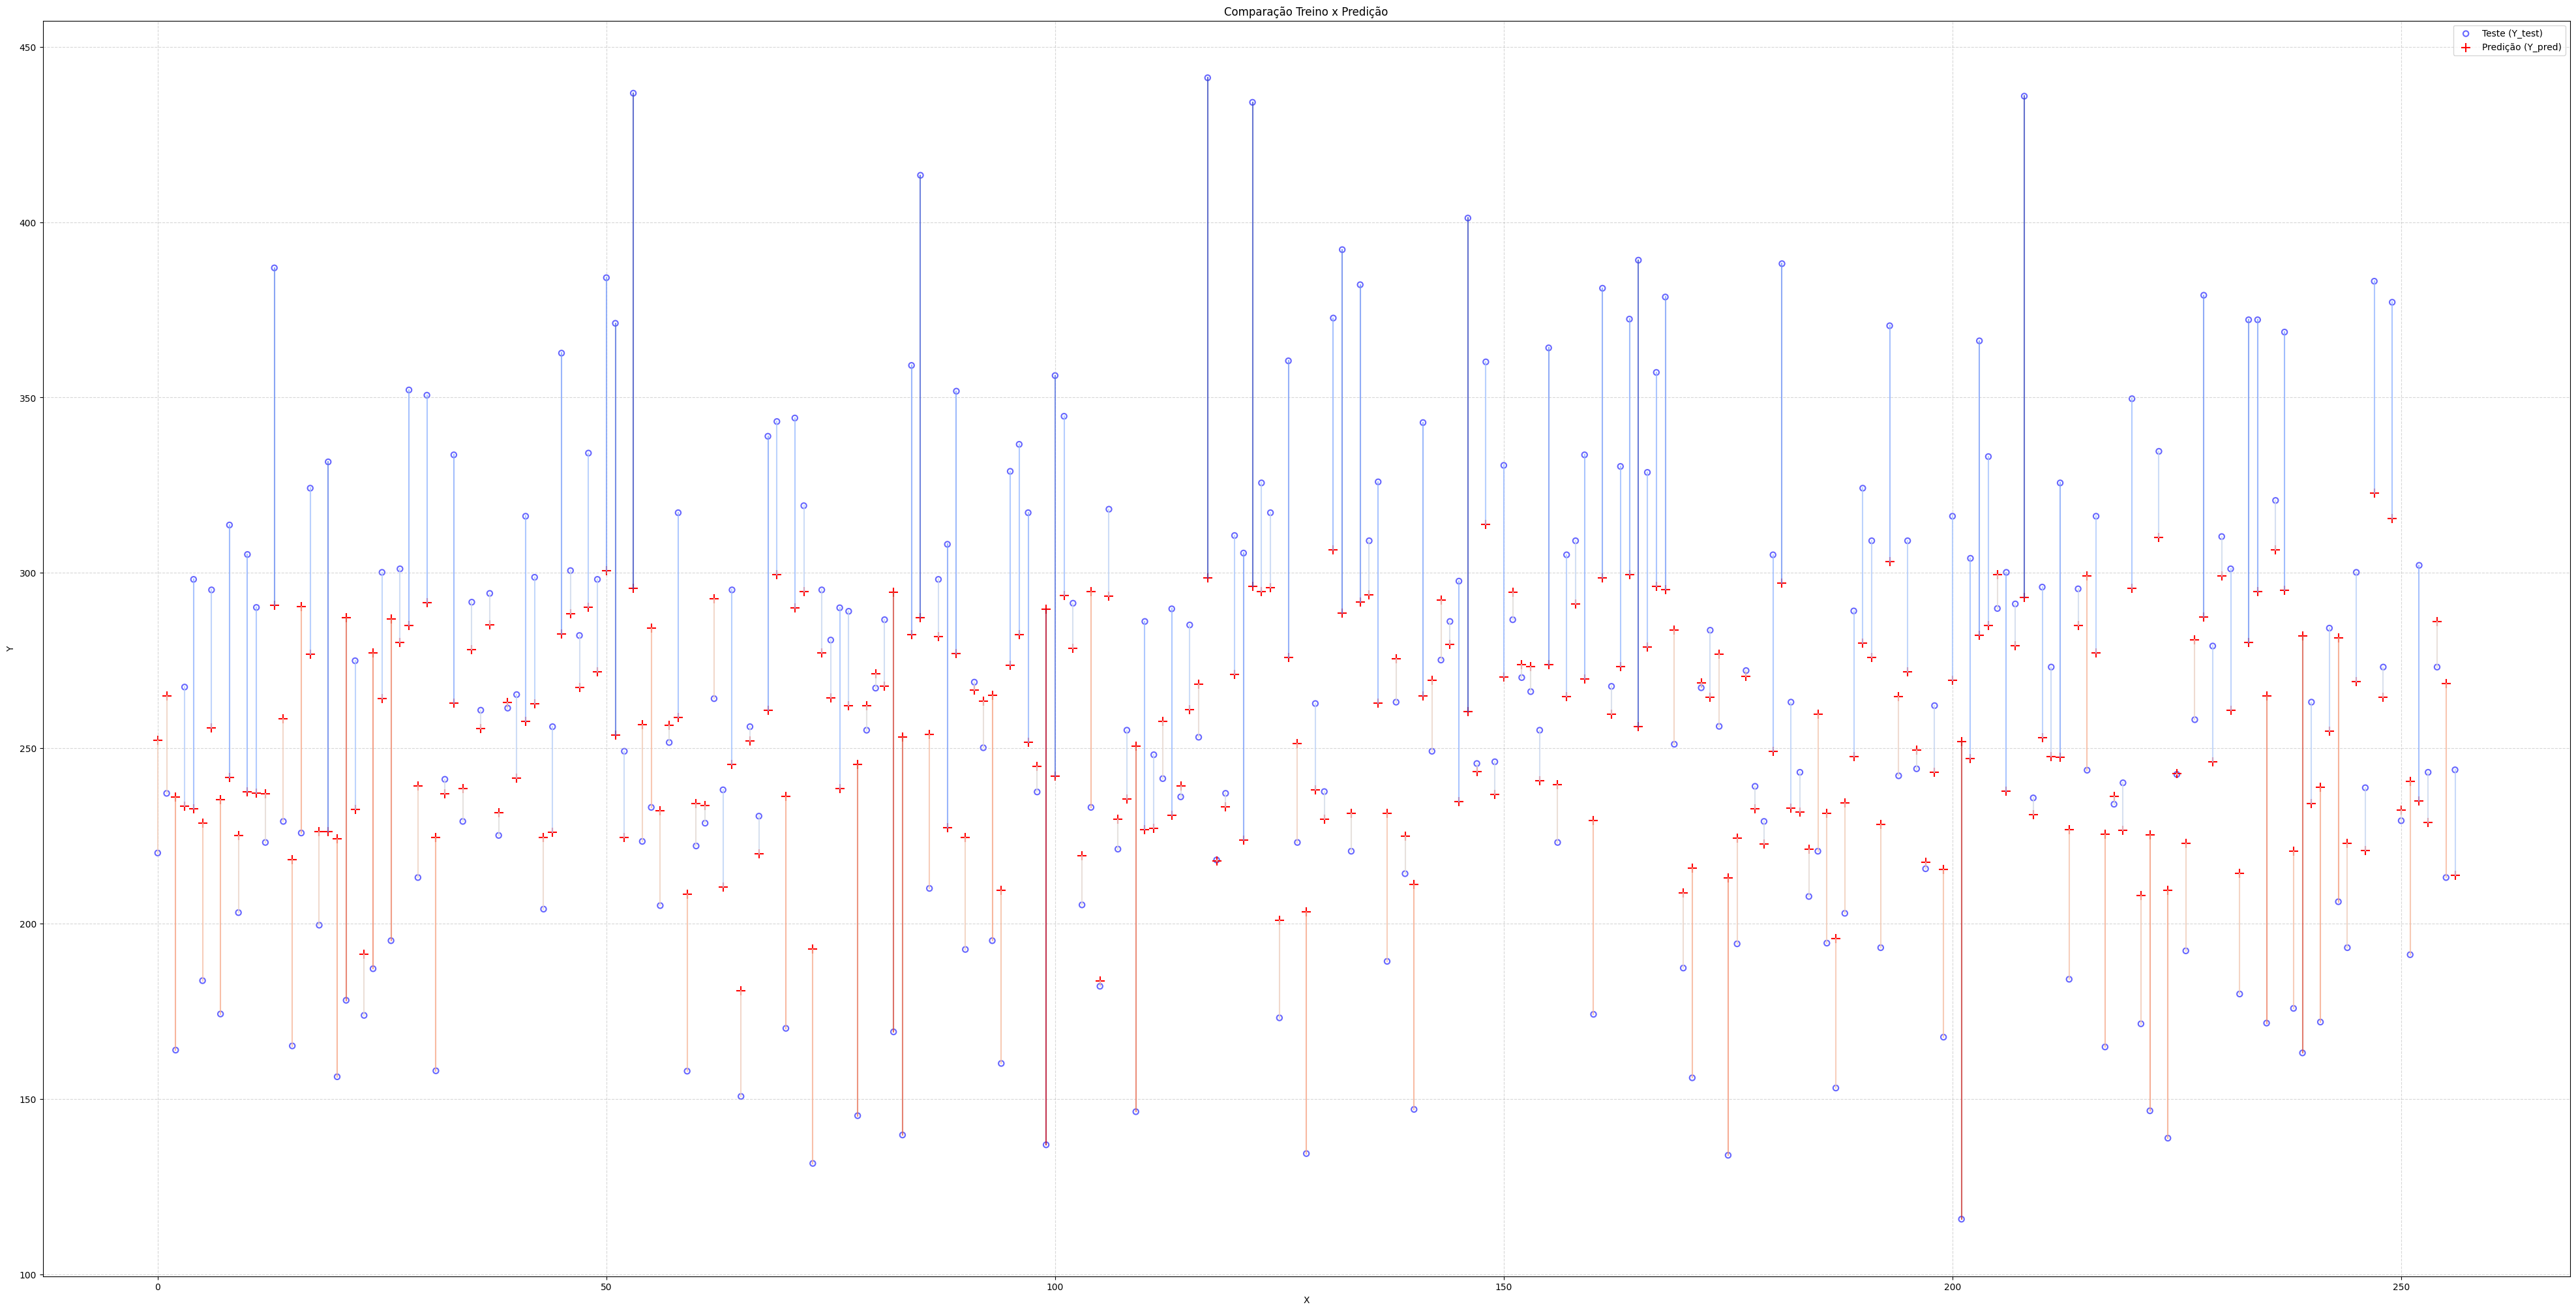

In [31]:
plt.figure(figsize=(50, 25))
x_range = np.arange(0, len(X_test), 1)
plt.scatter(x_range, Y_test, color='blue', alpha=0.6, label='Teste (Y_test)', facecolors='none', edgecolors='blue', linewidths=1.5)
plt.scatter(x_range, pred, color='red', marker='+', label='Predição (Y_pred)', s=100)

diff = pred - Y_test

norm = Normalize(vmin=np.min(diff), vmax=np.max(diff))
cmap = plt.cm.coolwarm  # azul pra negativo, vermelho pra positivo

for x, y_real, y_est, d in zip(x_range, Y_test, pred, diff):
    cor = cmap(norm(d))
    plt.plot([x, x], [y_real, y_est], color=cor, linewidth=1.5, alpha=0.8)

plt.title("Comparação Treino x Predição")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig("NonLinearSVRScaled.png", dpi=300, bbox_inches='tight')
plt.show()

In [32]:
svr_scores = cross_val_score(gs.best_estimator_, melting_point["data"], melting_point["target"], cv=10, scoring='neg_mean_absolute_error')
print(svr_scores)
print(svr_scores.mean())
print(svr_scores.std())

D:\puc\ml\venv\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
D:\puc\ml\venv\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
D:\puc\ml\venv\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
D:\puc\ml\venv\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
D:\puc\ml\venv\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with Stan

[-48.75170761 -43.41388702 -49.76340505 -46.2932066  -48.38429452
 -46.10086293 -46.85182532 -45.49883115 -49.09732149 -46.7900839 ]
-47.0945425585164
1.8280665180217792


D:\puc\ml\venv\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


# SVR Linear (PCA)

In [33]:
df = pd.read_csv('./melting-point/train_wz_ws.csv')

In [34]:
melting_point={}
melting_point["data"] = df.drop(['Tm'], axis=1).values
melting_point["target"] = df["Tm"].values

In [35]:
from sklearn.svm import LinearSVR
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

lsvr = LinearSVR(max_iter=1000)

svm_pipe = Pipeline([
    ('pca', PCA(n_components=150)),
    ('svm', lsvr)
])
svm_scores = cross_val_score(svm_pipe, melting_point['data'], melting_point["target"], cv=10, scoring='neg_mean_absolute_error')
print(svm_scores)
print(svm_scores.mean())
print(svm_scores.std())

[-41.93693171 -37.02512718 -41.83951926 -38.08522972 -39.66962058
 -38.87868067 -42.6782102  -37.38672127 -40.09146087 -35.6229645 ]
-39.32144659592611
2.2267184359520256


In [36]:
from sklearn.model_selection import GridSearchCV
import multiprocessing

parameters = {
    'svm__C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0],
    'svm__loss': ['epsilon_insensitive', 'squared_epsilon_insensitive']
}
clf = GridSearchCV(svm_pipe, parameters, n_jobs=multiprocessing.cpu_count(), cv=10, scoring='r2')

In [37]:
clf.fit(X_train, Y_train)
pred = clf.predict(X_test)

print("R2 score:", clf.score(X_test, Y_test))
print("Mean Absolute error:", mean_absolute_error(Y_test, pred))

R2 score: 0.6367229668080696
Mean Absolute error: 31.739251548606724


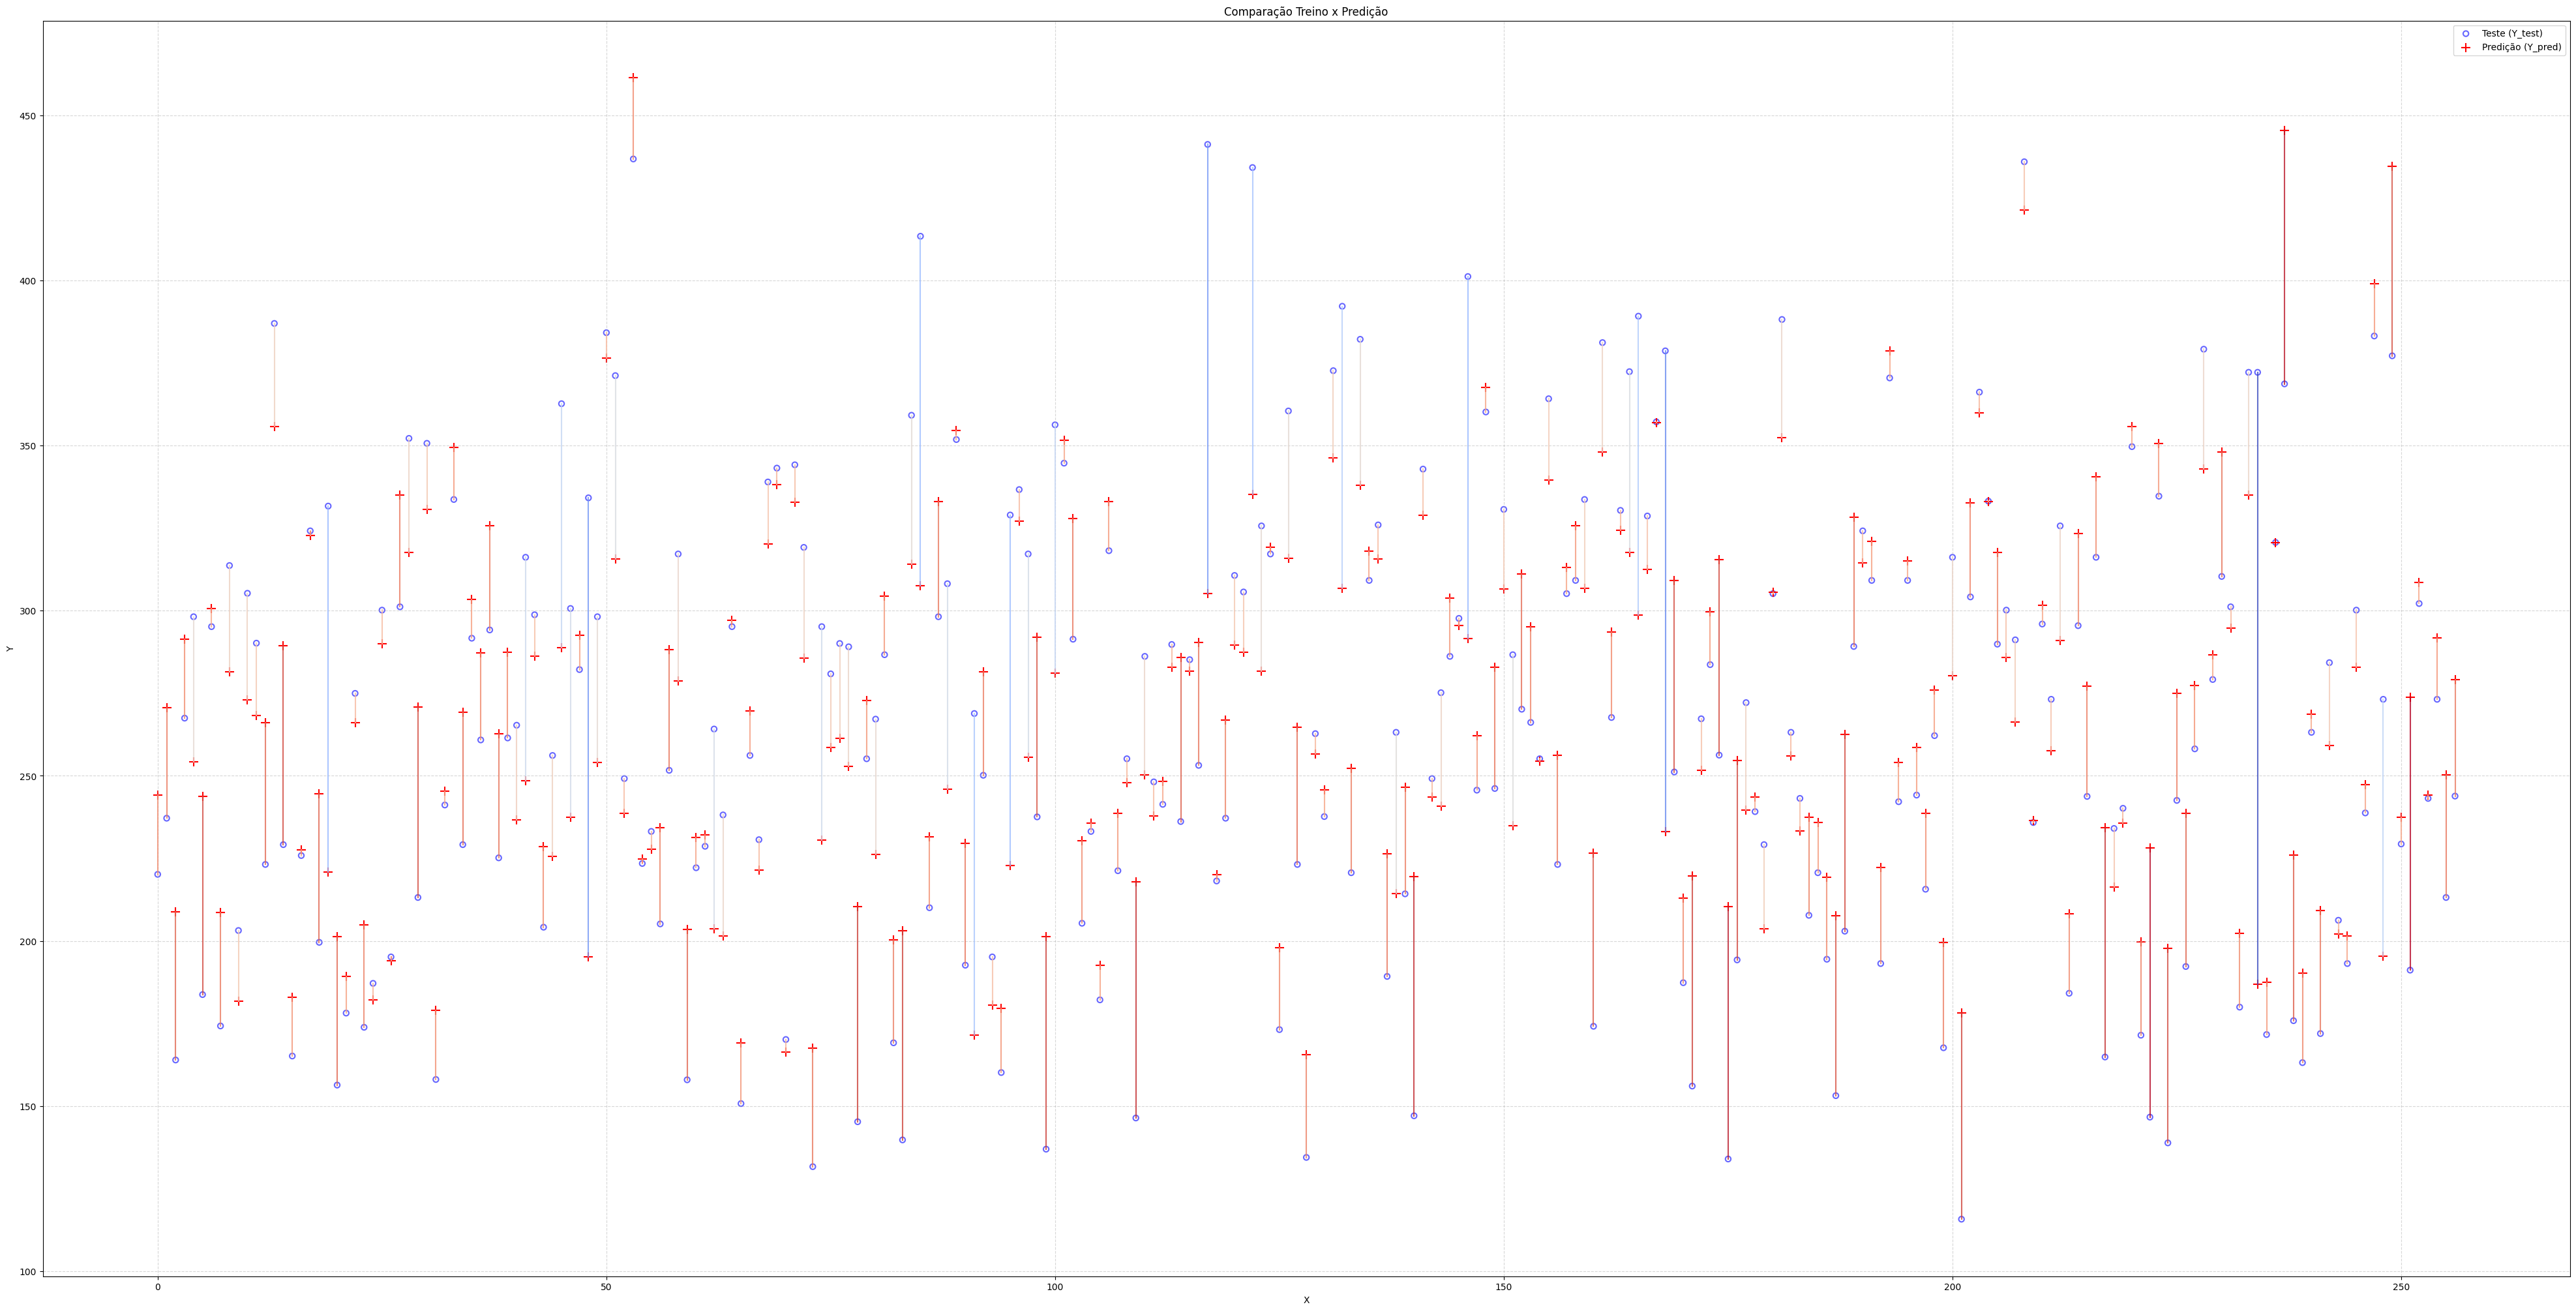

In [38]:
plt.figure(figsize=(50, 25))
x_range = np.arange(0, len(X_test), 1)
plt.scatter(x_range, Y_test, color='blue', alpha=0.6, label='Teste (Y_test)', facecolors='none', edgecolors='blue', linewidths=1.5)
plt.scatter(x_range, pred, color='red', marker='+', label='Predição (Y_pred)', s=100)

diff = pred - Y_test

norm = Normalize(vmin=np.min(diff), vmax=np.max(diff))
cmap = plt.cm.coolwarm  # azul pra negativo, vermelho pra positivo

for x, y_real, y_est, d in zip(x_range, Y_test, pred, diff):
    cor = cmap(norm(d))
    plt.plot([x, x], [y_real, y_est], color=cor, linewidth=1.5, alpha=0.8)

plt.title("Comparação Treino x Predição")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig("LinearSVR_PCA.png", dpi=300, bbox_inches='tight')
plt.show()

In [39]:
lsvr_scores = cross_val_score(clf.best_estimator_, melting_point["data"], melting_point["target"], cv=10, scoring='neg_mean_absolute_error')
print(lsvr_scores)
print(lsvr_scores.mean())
print(lsvr_scores.std())

[-36.55640786 -35.05836647 -37.9458089  -33.23208707 -36.27344737
 -33.56354838 -38.52644783 -35.80561292 -37.92267864 -33.26929731]
-35.81537027532742
1.8944160481483066


# SVR Não-Linear (PCA)